# Trabajo Semana 8

## Asignatura: Computer vision

### Especialización en Inteligencia Artificial

#### Integrantes:

* Jorge Armando Serrano Duque
* Daniel Cadavid Zuleta
* Oscar Yesid Cárdenas Santos
* Saúl Andrés Garnica Gutiérrez
* Michael Andrés Mora Poveda

In [1]:
import cv2
print(cv2.__version__)

4.8.0


In [2]:
import skimage
print(skimage.__version__)

0.19.2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
image_color = cv2.imread("bascula.jpeg")
image = cv2.imread("bascula.jpeg")

#### Filtros seleccionados para el ejercicio:

1. canny
2. Thresholding 
3. Trasformación morfológica (dilatación)
4. Trasformación morfológica (erosión)

#### Filtros seleccionados para el ejercicio:

##### Filtros lineales:
1. Filtro gaussiano
2. Filtro lineal con máscaras de convolución
3. Filtro de la media

##### Filtros No lineales:

4. Filtro de la mediana
5. Filtro del mínimo ó del máximo

In [5]:
def plot_cv_image(input_image):
    """
    Converts an image from BGR to RGB and plots
    """
    #Change color channels order for matplotlib
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    
    #For easier view
    plt.axis('off')
    plt.show()

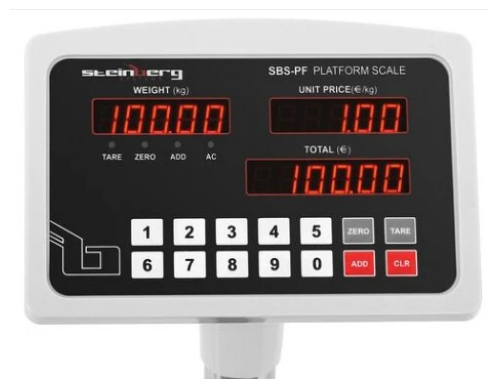

In [6]:
plot_cv_image(image)

### 1. Filtro canny

https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.canny

In [7]:
from skimage.feature import canny

In [8]:
from skimage import io, feature

In [9]:
image = io.imread('bascula.jpeg', as_gray=True)

In [10]:
edges = feature.canny(image, sigma=1)

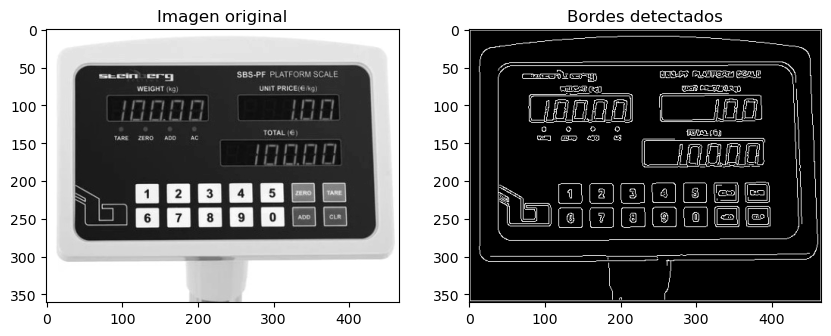

In [11]:
# Mostrar la imagen original y los bordes detectados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax0, ax1 = axes.ravel()
ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Imagen original')

ax1.imshow(edges, cmap=plt.cm.gray)
ax1.set_title('Bordes detectados')

plt.show()

### 2. Filtro Thresholding

https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding_guide.html



In [12]:
from skimage.filters import try_all_threshold
from skimage.filters import threshold_mean


In [13]:
thresh = threshold_mean(image)

In [14]:
binary = image > thresh

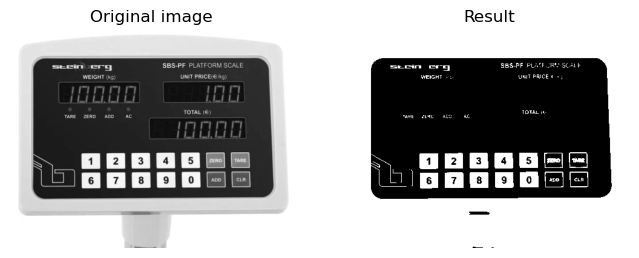

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()



### 3. Trasformación morfológica (dilatación)

https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.dilation

https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py

https://scikit-image.org/docs/stable/api/skimage.html

In [16]:
from skimage.morphology import dilation
from skimage.util import img_as_ubyte


In [17]:
original_image = img_as_ubyte(image)

In [18]:
trans_dilation = dilation(original_image)

In [19]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

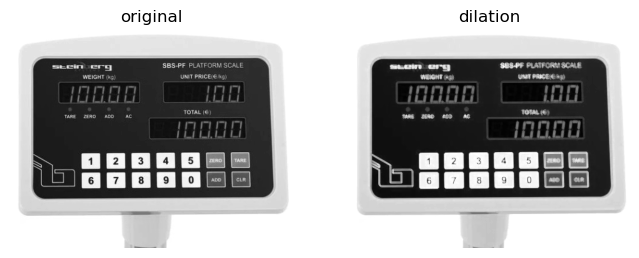

In [20]:
plot_comparison(original_image, trans_dilation, 'dilation')

### 4. Trasformación morfológica (erosión)

https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.erosion

https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py



In [21]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)

In [22]:
trans_erosion = erosion(original_image)

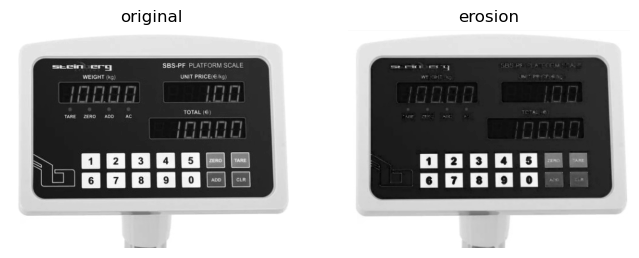

In [23]:
plot_comparison(original_image, trans_erosion, 'erosion')

### 5. Trasformación morfológica (erosión)

https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.skeletonize

https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html#white-tophat


In [24]:
from skimage.morphology import skeletonize, convex_hull_image
import pandas as pd
import numpy as np

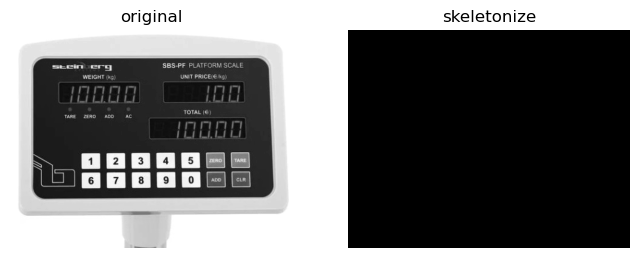

In [25]:
sk = skeletonize(image == 0)
plot_comparison(image, sk, 'skeletonize')

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

rng = np.random.default_rng()

astro = color.rgb2gray(image_color)

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (rng.poisson(lam=25, size=astro.shape) - 10) / 255.

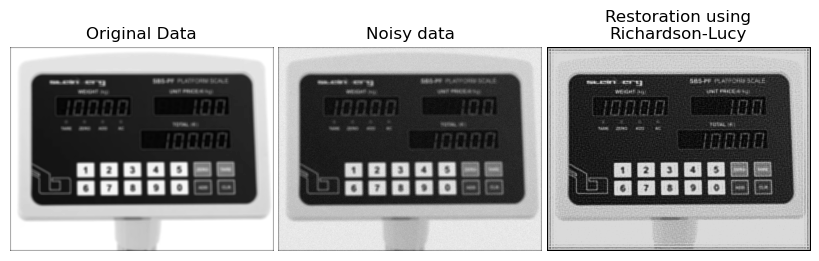

In [27]:
# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf,  30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

## Referencias:

1. Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.


2. Dadhich, Abhinav. Practical Computer Vision : Extract Insightful Information from Images Using TensorFlow, Keras, and OpenCV, Packt Publishing, Limited, 2018. ProQuest Ebook Central, https://ebookcentral.proquest.com/lib/bibliouniminuto-ebooks/detail.action?docID=5287235.